# Machine Learning

---

## Conceitos

> Simplificando. Apresentação e explicação de conceitos de forma dinâmica.

- Vamos partir do processo de separação de dados, como eu posso separar uma base de dados, em grupos de indivíduos semelhantes com base nas características, ou seja, as variáveis independentes?

```py
> Sinônimos de Variáveis Independentes:
'Atributos' / 'Covariáveis' / 'Variáveis Explicativas' / 'Variáveis Preditoras'

> Sinônimos de Variável Dependente:
'Variável Alvo' / 'Variável Resposta'
```

>  Criando regras é que podemos separar os nossos conjuntos de dados.
- Por exemplo, vamos olhar para um cenário de varejo.

1. Uma carteira de clientes dessa empresa pode conter as features (variáveis independentes): `identificador do cliente`, `idade`, `gênero`, `possui filhos` (sim: 1, não: 0), etc.
2. Enquanto na base de produtos vão estar diversas informações de produtos como, por exemplo de roupas: `cor`, `tamanho`, `modelo`, `marca`, `composição`, `categoria` (adulto, infantil), `genero` (u: unisex, m: masculino, f: feminino).

- Estes são exemplos de maneiras de representar um cliente e uma roupa em forma de matriz tabela, cada atributo é uma coluna da minha matriz.

- A partir disso separar meus produtos por grupos, categorizar com base nas condições, o que significa que o fator determinante para cada produto pertencer ou não a uma categoria é se ele possui ou não uma dada característica.

- Com esse reciocínio de ***filtrar*** meus grupos para ***separar*** os produtos vem a ideia de pureza, uma metáfora pode ser filtrar água.
- Nesse caso queremos "filtrar" dados, para isso existe o algoritmo da `ÁRVORE DE DECISÃO` ( `DECISION TREE` )

- Consiste em muitos `ifs` para "purificar" os dados em grupos com características semelhantes

### Algoritmo Árvore de Decisão ( `Decision Tree` )
> Esse algoritmo é usado em:
- `Random Forest`,
- em `Gradient Boosting`,
- em `Adaptive Boosting - AdaBoost`,
- em `XGBoost - Extreme Gradient Boosting`,
- em `LGBM - Light Gradient Boosting Machine`,
- em `Cat Boosting` ( Categorical Boosting ), entre outros.

1. Divide a amostra em `nós` ( `nodes` ) com base em variáveis semelhantes.
2. A árvore pode ser simétrica ou assimétrica.

- [O que é uma Árvore de Decisão? - IBM](https://www.ibm.com/br-pt/think/topics/decision-trees)
- [Árvores de Decisão - Scikit Learn](https://scikit-learn.org/stable/modules/tree.html)

> Algoritmos precursores da `Decision Tree`:
- [Algoritmo ID3 - (Ross Quinlan, 1986)](https://link.springer.com/article/10.1007/BF00116251)
- [Algoritmo CART (Breiman et al., 1984)](https://www.stat.berkeley.edu/users/breiman/arc97.pdf)

> Implementando uma Decision Tree com um dataset de frutas

In [25]:
from pathlib import Path
import pandas as pd


path = Path()
data = path/'../data'

In [26]:
'Os dados são a minha amostra, os exemplos, tabela é a abstração de algo do mundo real, nesse caso frutas.'
df = pd.read_excel(data/'dados_frutas.xlsx')
df

,Arredondada,Suculenta,Vermelha,Doce,Fruta
0,0,1,1,1,Morango
1,1,0,0,0,Limão
2,1,1,0,1,Pera
3,0,0,0,1,Banana
4,1,1,1,1,Cereja
5,1,1,1,0,Tomate
6,1,1,1,1,Maçã


In [27]:
from sklearn import tree


arvore = tree.DecisionTreeClassifier(random_state=42)

> `y` é a _Variável **RESPOSTA**_, _Variável **DEPENDENTE**_ ou _Variável **ALVO**_ ( Também interpreto como podendo ser _IMAGEM_ do _CONTRADOMÍNIO_ de uma função )

In [28]:
y = df['Fruta']

> As características (`Atributos`) de cada uma das observações de dados no meu conjunto de dados

In [29]:
caracteristicas = ['Arredondada', 'Suculenta', 'Vermelha', 'Doce']

> `X` são _Variáveis **INDEPENDENTES**_, _Variáveis DE **ENTRADA**_, _**ATRIBUTOS**_, _**COVARIÁVEIS**_, _Variáveis **PREDITORAS**_, _Variáveis **EXPLICATIVAS**_

In [30]:
X = df[caracteristicas]

> O `.fit()` cria um classificador de árvore de decisão a partir do conjunto de treinamento `(X, y)`.
- Ele recebe o `X` e o `y`

In [31]:
arvore.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
arvore.predict([[1,1,1,1]])

/home/jhonathanwesley/workspace/machine_learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Cereja'], dtype=object)

In [33]:
arvore.predict([[0,1,1,1]])

/home/jhonathanwesley/workspace/machine_learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Morango'], dtype=object)

In [34]:
arvore.predict([[1,0,1,1]])

/home/jhonathanwesley/workspace/machine_learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Cereja'], dtype=object)

In [35]:
arvore.predict([[1,1,0,1]])

/home/jhonathanwesley/workspace/machine_learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Pera'], dtype=object)

In [36]:
arvore.predict([[1,1,1,0]])

/home/jhonathanwesley/workspace/machine_learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Tomate'], dtype=object)

> Plotando a `Decision Tree` para visualização

[Text(0.4090909090909091, 0.875, 'Arredondada <= 0.5\ngini = 0.857\nsamples = 7\nvalue = [1, 1, 1, 1, 1, 1, 1]\nclass = Banana'),
 Text(0.18181818181818182, 0.625, 'Suculenta <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 0, 1, 0, 0]\nclass = Banana'),
 Text(0.29545454545454547, 0.75, 'True  '),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]\nclass = Banana'),
 Text(0.2727272727272727, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0]\nclass = Morango'),
 Text(0.6363636363636364, 0.625, 'Vermelha <= 0.5\ngini = 0.8\nsamples = 5\nvalue = [0, 1, 1, 1, 0, 1, 1]\nclass = Cereja'),
 Text(0.5227272727272727, 0.75, '  False'),
 Text(0.45454545454545453, 0.375, 'Suculenta <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 0, 1, 0]\nclass = Limão'),
 Text(0.36363636363636365, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]\nclass = Limão'),
 Text(0.5454545454545454, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0

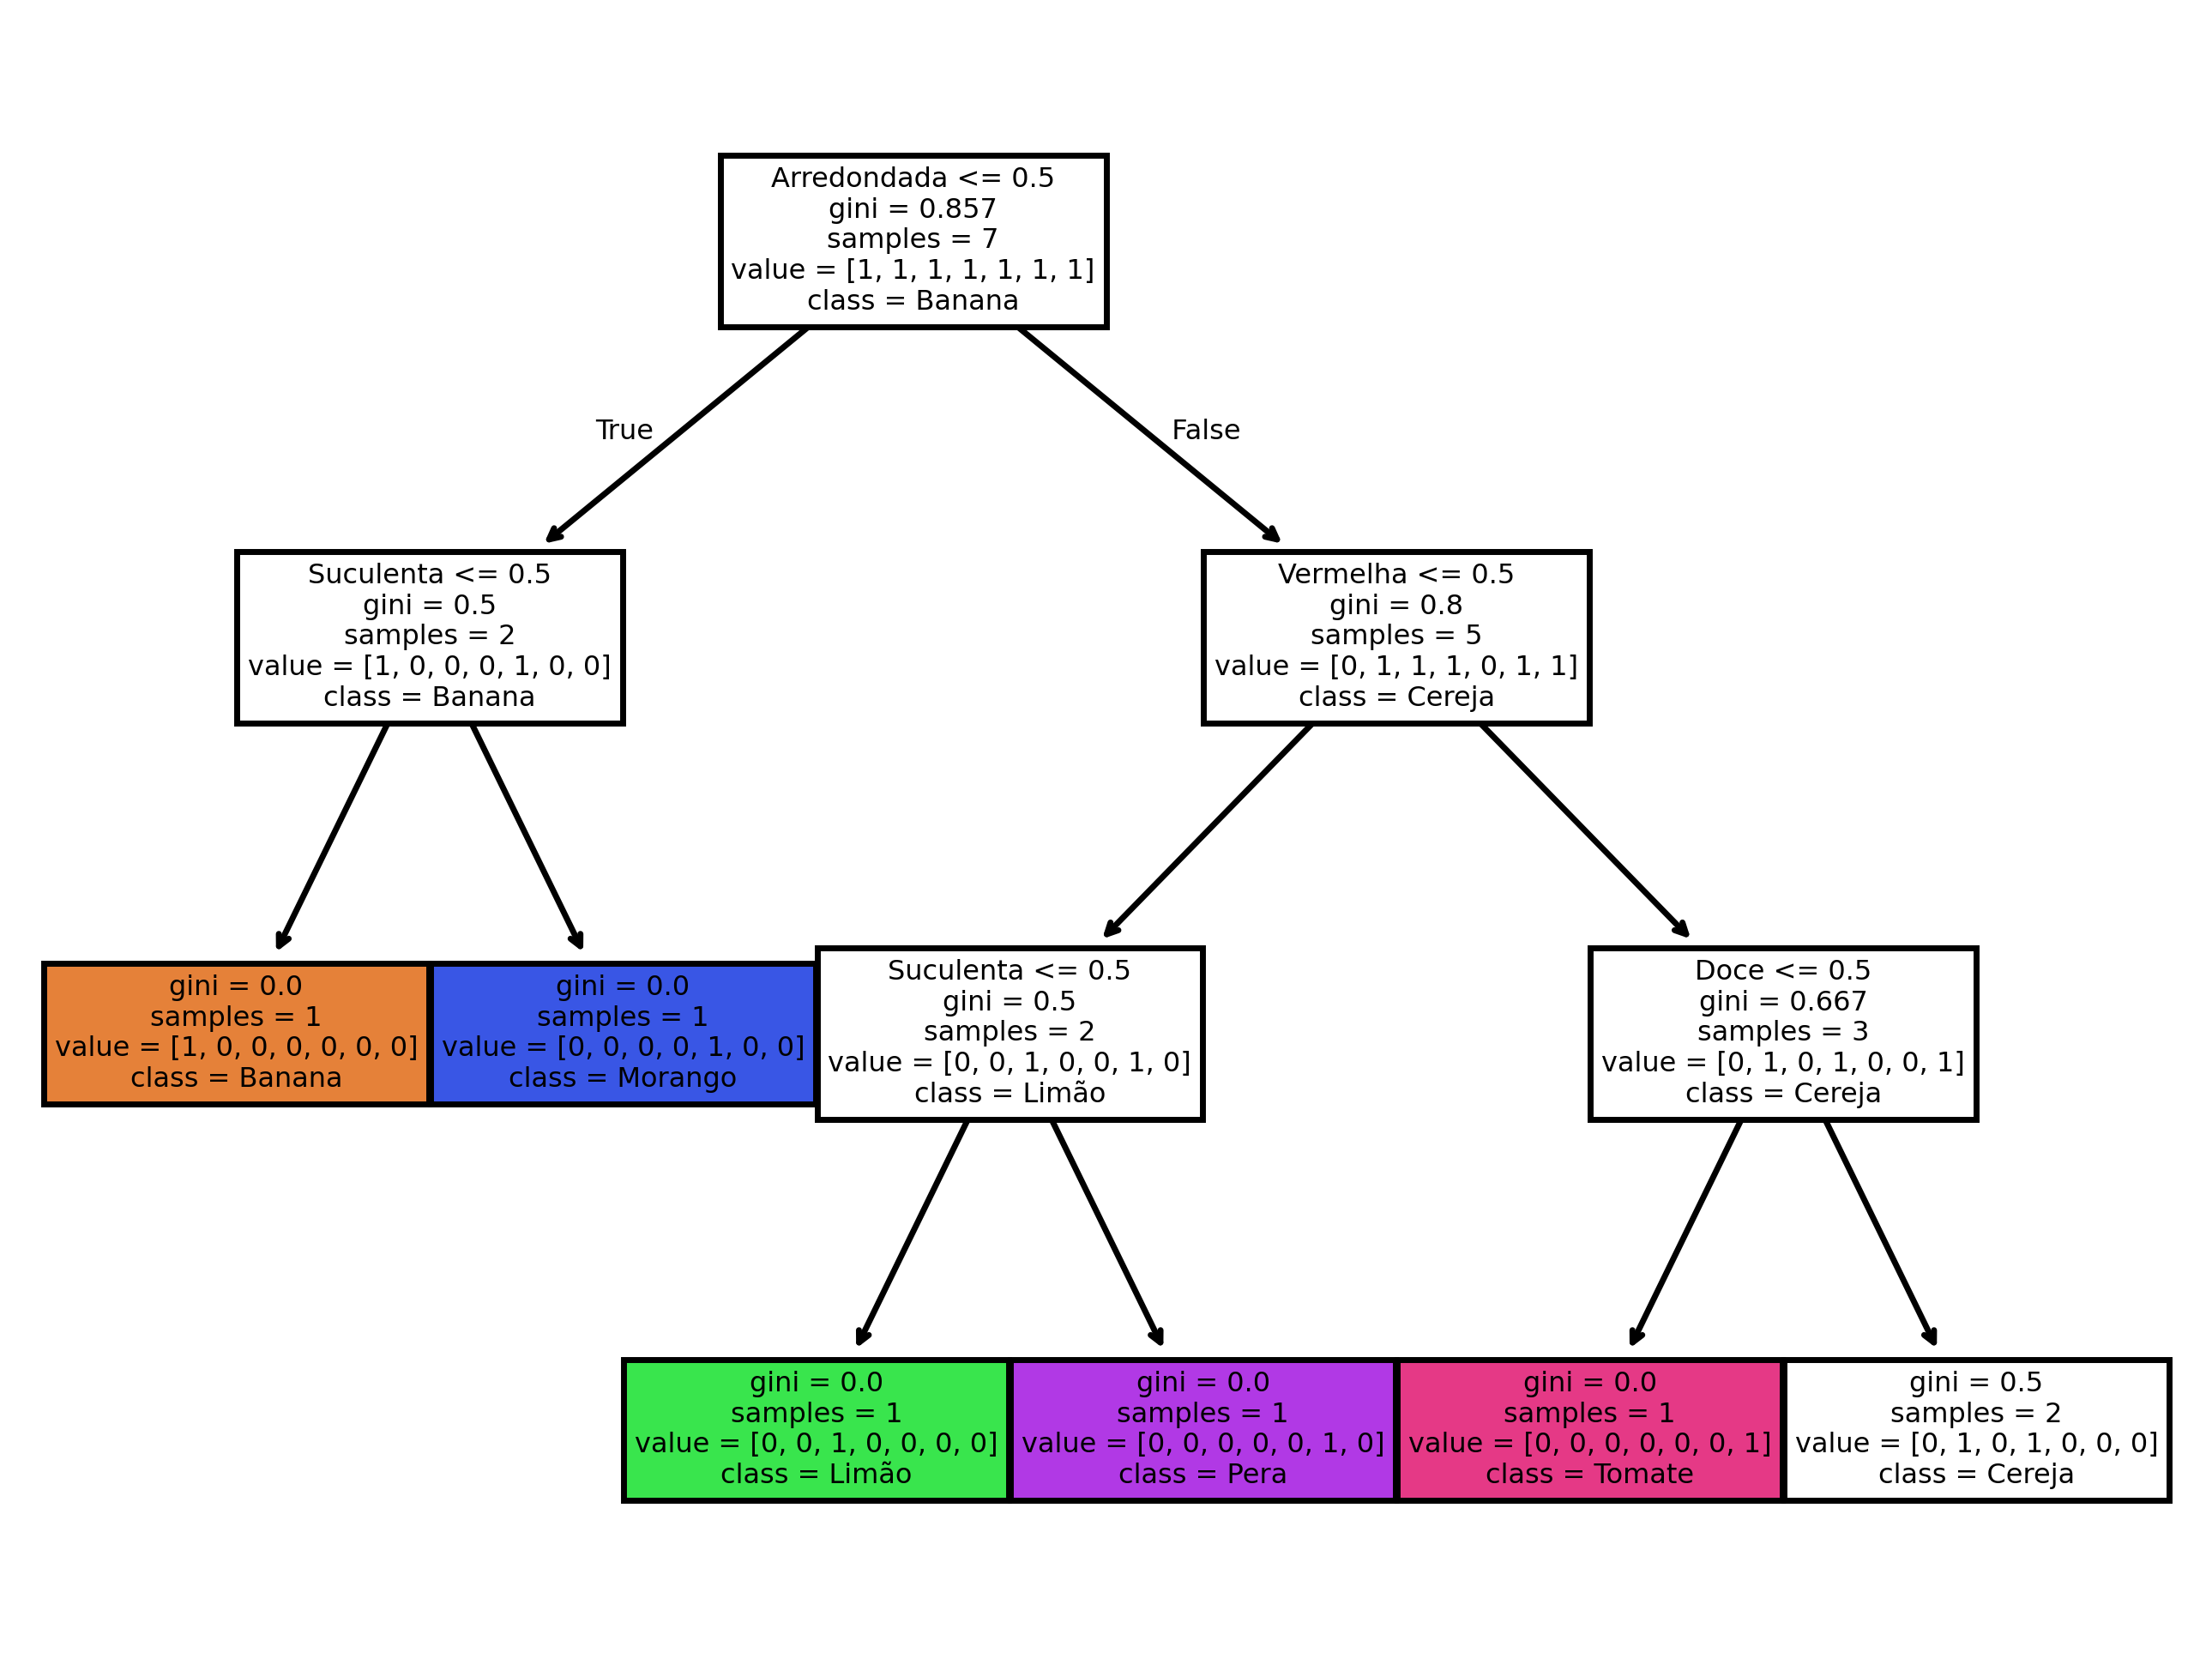

In [37]:
import matplotlib.pyplot as plt


plt.figure(dpi=500)

tree.plot_tree(
    arvore,
    feature_names=caracteristicas,
    class_names=arvore.classes_,
    filled=True,
)

In [38]:
proba = arvore.predict_proba([[0, 0, 0, 0]])[0]
pd.Series(proba, index=arvore.classes_)

/home/jhonathanwesley/workspace/machine_learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Banana     1.0
Cereja     0.0
Limão      0.0
Maçã       0.0
Morango    0.0
Pera       0.0
Tomate     0.0
dtype: float64